<a href="https://colab.research.google.com/github/cecilia-wanja/An-analysis-of-electric-cars/blob/master/Moringa_Data_Science_Core_W3_Independent_Project_2019_23rd_Cecilia_Gichohi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION

To identify some areas and periods of interest via sampling, stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

# HYPOTHESIS

H0 :Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z?

## METRICS OF SUCCESS

1. Find and deal with outliers, anomalies, and missing data within the dataset.

2. Plot univariate and bivariate summaries recording our observations.

3. Implement the solution by performing the respective analysis i.e. reduction, modeling, etc.

4. Challenge our solution by providing insights on how we can make improvements.

#UNDERSTANDING OUR DATASET

The dataset provided gives us insights on a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).

# EXPERIMENTAL DESIGN

We will use a systematic format.Tis is by cleaning the data, performing univariate, bivariate and finally multivariate analysis.

# APPROPRIATENESS OF DATA

In this project, we need to identify some areas and periods of interest via sampling.This includes the data for the respective cars,the number used and returned etc.This dataset provides all that.

In [0]:
#IMPORTING THE NECESSARY LIBRARIES

#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing seaborn
import seaborn as sns

#importing matplotlib package
import matplotlib.pyplot as py
%matplotlib inline

#importing scipy
from scipy import stats

#importing ttest_1samp
from scipy.stats import ttest_1samp

#importing ttest_ind
from scipy.stats import ttest_ind

#importing pandas profiling
import pandas_profiling as pp

from IPython.display import display

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [153]:
#We first need to retrieve our data
autolib = pd.read_csv("/content/autolib_daily_events_postal_code.csv")
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#1. CLEANING 


In [154]:
#previewing the bottom part of our data
autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [155]:
#the statistical values of each row
autolib.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [156]:
#the datset information of each column
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
Postal code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayOfWeek                 16085 non-null int64
day_type                  16085 non-null object
BlueCars_taken_sum        16085 non-null int64
BlueCars_returned_sum     16085 non-null int64
Utilib_taken_sum          16085 non-null int64
Utilib_returned_sum       16085 non-null int64
Utilib_14_taken_sum       16085 non-null int64
Utilib_14_returned_sum    16085 non-null int64
Slots_freed_sum           16085 non-null int64
Slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [157]:
#getting number of rows and columns
autolib.shape

(16085, 13)

In [158]:
#getting my column names
autolib.columns.values

array(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek',
       'day_type', 'BlueCars_taken_sum', 'BlueCars_returned_sum',
       'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum',
       'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum'],
      dtype=object)

In [159]:
#getting individual column datatypes
autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [0]:
#unifying my column names
autolib.columns = autolib.columns.str.replace(" ", "").str.lower()

In [161]:
pp.ProfileReport(autolib)

Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


In [162]:
#finding my postal code values
autolib.postalcode.unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [163]:
#checking for outliers
autolib.isnull().sum()

postalcode                0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

our dataset has no outliers

In [164]:
#checking for duplicates
autolib.duplicated().sum()
#there are no duplicated values in our dataset.

0

# SAMPLING


The sampling method in use is Simple Random Sampling to give each dataset attribute a fair chance of being selected.

In [165]:
autolib.shape

(16085, 13)

In [166]:
autolibnew = autolib.sample(n = 2000, replace = 'False')
autolibnew

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
13626,94130,2/6/2018,1439,1,weekday,22,17,1,1,3,3,0,0
14774,94340,4/6/2018,1364,4,weekday,27,24,2,2,1,0,0,0
1944,75013,3/17/2018,1440,5,weekend,681,678,43,43,42,43,169,168
10002,93100,2/5/2018,1440,0,weekday,114,129,2,2,2,3,8,9
2276,75015,4/6/2018,1364,4,weekday,875,840,25,24,54,50,215,209
10271,93110,6/12/2018,1439,1,weekday,22,29,2,1,5,5,0,0
5940,92200,1/16/2018,1440,1,weekday,60,59,2,2,1,1,0,0
9441,92500,4/12/2018,1440,3,weekday,110,115,10,7,9,11,0,0
4888,92120,2/28/2018,1429,2,weekday,80,77,2,3,8,10,0,0
14127,94160,3/14/2018,1440,2,weekday,65,61,3,4,8,8,5,5


In [167]:
autolibnew.shape

(2000, 13)

# UNIVARIATE ANALYSIS

Univariate analysis involves analysis of single variables.In this case, all the columns.

We will group the sample by the day type, postalcode and bluecars taken sum.

In [168]:
autolibnew.groupby(['day_type','postalcode','bluecars_taken_sum']).count().sort_values(by='day_type',ascending=False)

date  ...  slots_taken_sum
day_type postalcode bluecars_taken_sum        ...                 
weekend  95880      37                     1  ...                1
         92160      33                     1  ...                1
         92120      115                    1  ...                1
         92130      13                     1  ...                1
                    207                    1  ...                1
                    225                    1  ...                1
                    241                    1  ...                1
                    301                    1  ...                1
         92140      91                     1  ...                1
         92150      115                    1  ...                1
                    122                    1  ...                1
                    141                    1  ...                1
                    148                    1  ...                1
                    149                    1  ...                1
                    157                    1  ...                1
                    190                    1  ...                1
         92160      36                     1  ...                1
         92120      102                    1  ...                1
         92160      41                     1  ...                1
                    44                     1  ...                1
                    53                     1  ...                1
         92170      67                     1  ...                1
                    73                     1  ...                1
                    92                     1  ...                1
         92190      71                     1  ...                1
                    85                     2  ...                2
                    88                     1  ...                1
                    92                     1  ...                1
                    96                     1  ...                1
         92200      69                     1  ...                1
...                                      ...  ...              ...
weekday  92290      13                     1  ...                1
                    12                     2  ...                2
                    11                     2  ...                2
                    8                      1  ...                1
                    4                      1  ...                1
         92310      47                     1  ...                1
                    49                     1  ...                1
                    50                     2  ...                2
         92320      58                     1  ...                1
         92330      35                     3  ...                3
                    33                     2  ...                2
                    29                     2  ...                2
                    28                     1  ...                1
                    26                     2  ...                2
         92320      66                     1  ...                1
                    65                     1  ...                1
                    64                     1  ...                1
                    60                     1  ...                1
                    52                     1  ...                1
         92310      53                     3  ...                3
         92320      50                     1  ...                1
                    47                     1  ...                1
                    46                     1  ...                1
                    44                     1  ...                1
                    40                     1  ...                1
         92310      63                     1  ...                1
                    61                     1  ...                1
                    

In [169]:
#selecting the element weekday in day type column to test my hypothesis.
df = autolibnew[autolibnew['day_type'] == "weekday"]
df.head()

,postalcode,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
13626,94130,2/6/2018,1439,1,weekday,22,17,1,1,3,3,0,0
14774,94340,4/6/2018,1364,4,weekday,27,24,2,2,1,0,0,0
10002,93100,2/5/2018,1440,0,weekday,114,129,2,2,2,3,8,9
2276,75015,4/6/2018,1364,4,weekday,875,840,25,24,54,50,215,209
10271,93110,6/12/2018,1439,1,weekday,22,29,2,1,5,5,0,0


In [170]:
#confirming if the unique values in day type is weekday only
df.day_type.unique()

array(['weekday'], dtype=object)

In [0]:
#bluecars_returned_sum is highly correlated with bluecars_taken_sum (ρ = 0.99866) Rejected
#date has a high cardinality: 156 distinct values Warning
#dayofweek has 2374 / 14.8% zeros Zeros
#slots_freed_sum is highly correlated with bluecars_returned_sum (ρ = 0.94826) Rejected
#slots_taken_sum is highly correlated with slots_freed_sum (ρ = 0.99922) Rejected
#utilib_14_returned_sum is highly correlated with utilib_14_taken_sum (ρ = 0.99206) Rejected
#utilib_14_taken_sum is highly correlated with bluecars_returned_sum (ρ = 0.94054) Rejected
#utilib_returned_sum is highly correlated with utilib_taken_sum (ρ = 0.98198) Rejected
#utilib_taken_sum has 5442 / 33.8% zeros Zeros

The following data was collected from the profiling of the autolib data.
Hence we will use the following columns: 

bluecars_returned_sum

slots_taken_sum

dayofweek

postalcode


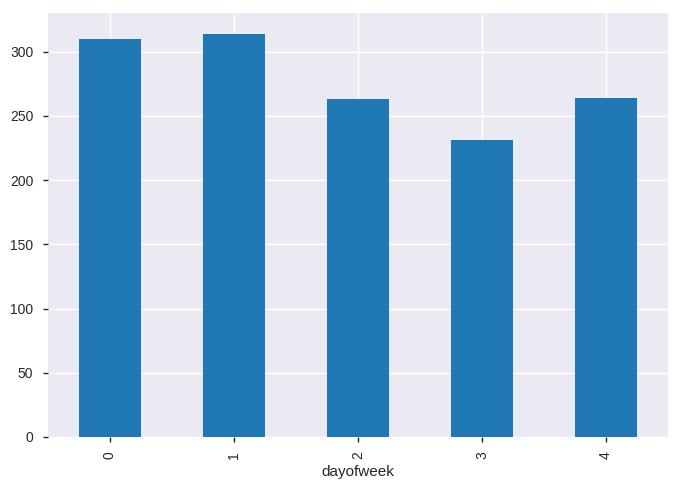

In [172]:
df.groupby("dayofweek")["dayofweek"].count().plot(kind = 'bar')

#this shows the number of entries of each day according to my sample
#most data was collected in Tuesday which is represented by 1.

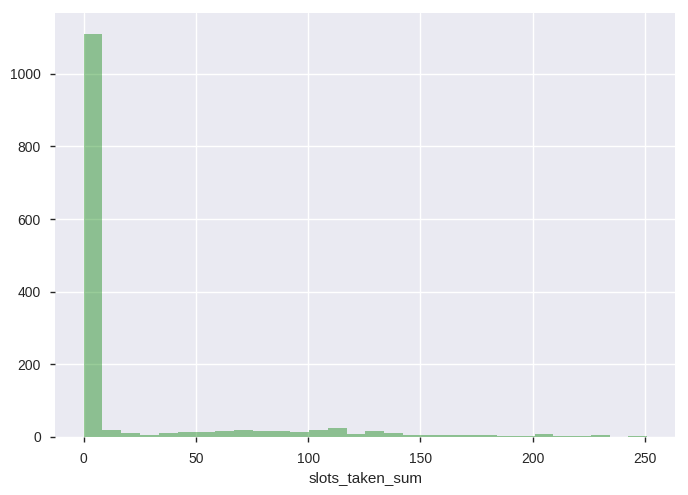

In [194]:
sns.distplot(df.slots_taken_sum, kde=False, bins = 30,color = 'green')

#most of the slots taken lie between 0 and 50 as compared to other values.

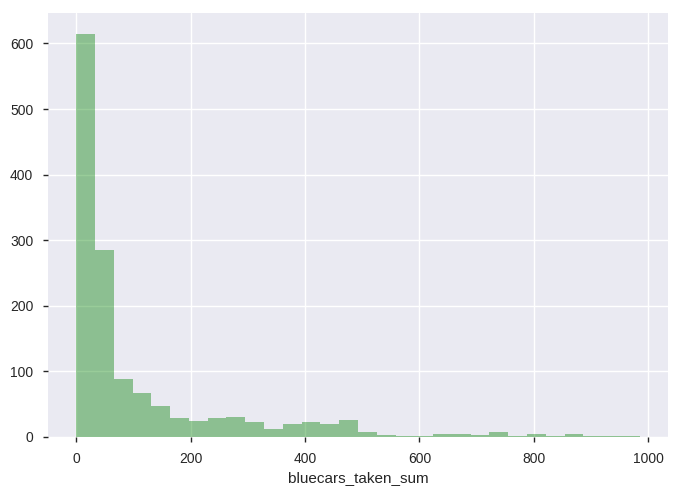

In [195]:
sns.distplot(df.bluecars_taken_sum, kde=False, bins = 30,color = 'green')

#most of the bluecars taken sum lies around 0 and 200 for the bluecars taken sum.

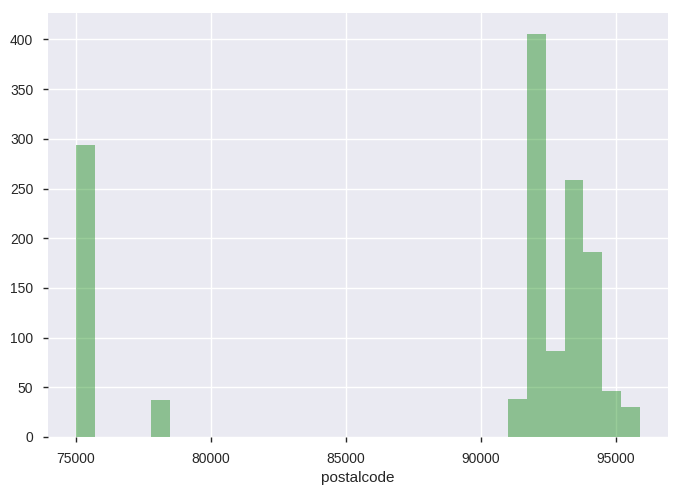

In [196]:
sns.distplot(df.postalcode, kde=False, bins = 30,color = 'green')

#most of the postal codes lie between 90000 and 95000.

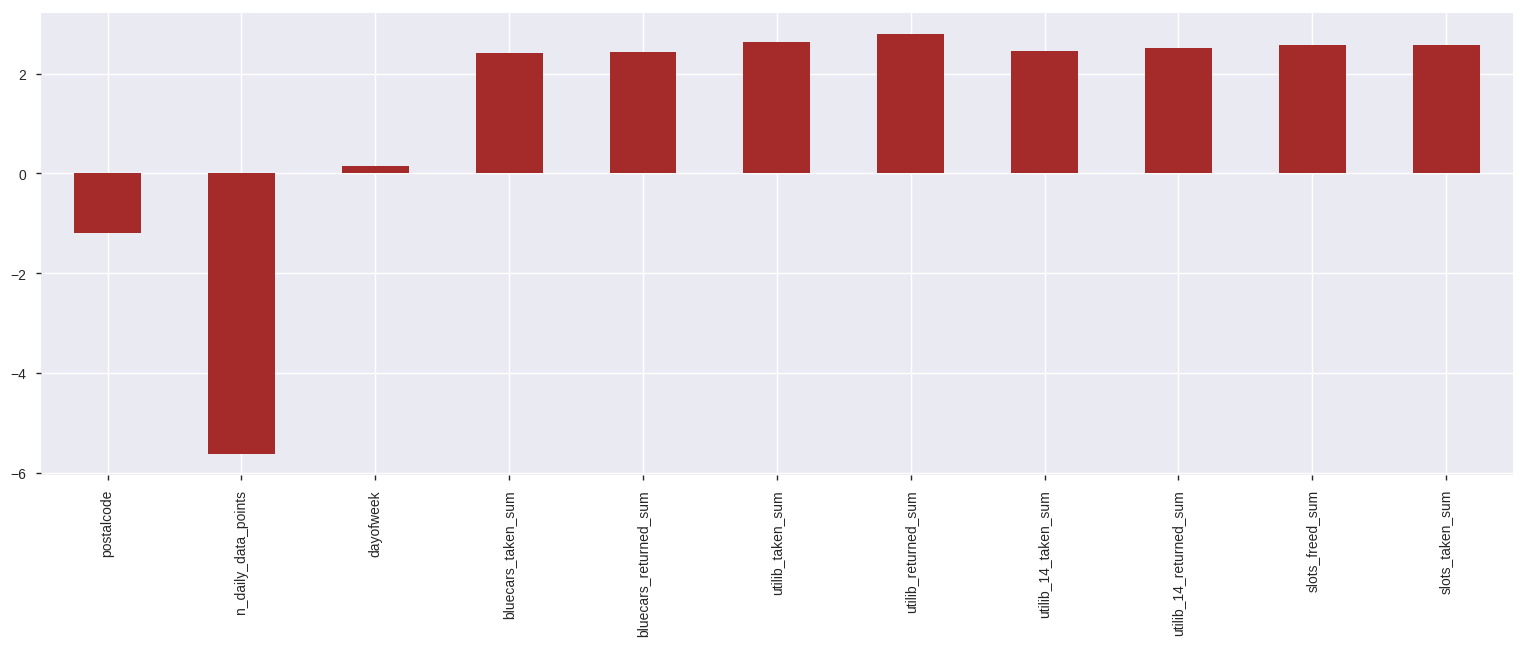

In [173]:
df.skew().plot.bar(figsize =(19,6), color = 'brown')
#this shows the measure of skewness for each column ; portraying some with a negative skewness and some with a positive one.

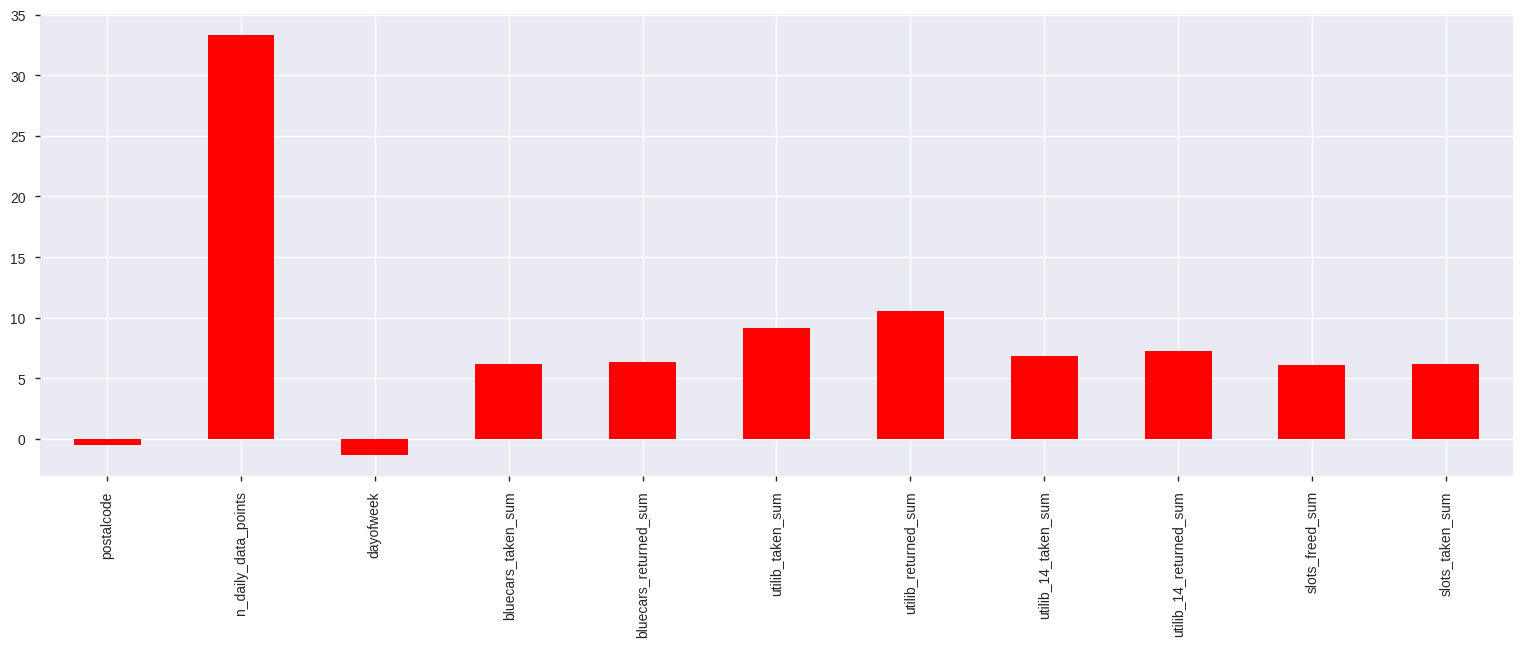

In [174]:
df.kurt().plot.bar(figsize =(19,6), color = 'red')
#if a column's kurtosis is negatively it has a flatter peak whereas a positive kurtosis shows a sharper peak

In [193]:
df.groupby('postalcode').count().head()

,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postalcode,,,,,,,,,,,,
75001,9,9,9,9,9,9,9,9,9,9,9,9
75002,10,10,10,10,10,10,10,10,10,10,10,10
75003,17,17,17,17,17,17,17,17,17,17,17,17
75004,12,12,12,12,12,12,12,12,12,12,12,12
75005,11,11,11,11,11,11,11,11,11,11,11,11


In [0]:
df1 = df.head()

In [180]:
df.date.unique()

array(['2/6/2018', '4/6/2018', '2/5/2018', '6/12/2018', '1/16/2018',
       '4/12/2018', '2/28/2018', '3/14/2018', '1/18/2018', '4/9/2018',
       '4/24/2018', '1/17/2018', '1/8/2018', '5/29/2018', '6/1/2018',
       '2/9/2018', '2/19/2018', '2/13/2018', '2/8/2018', '2/2/2018',
       '1/1/2018', '3/20/2018', '4/25/2018', '1/12/2018', '4/13/2018',
       '3/26/2018', '2/1/2018', '6/8/2018', '5/28/2018', '1/19/2018',
       '3/19/2018', '2/14/2018', '3/22/2018', '5/21/2018', '4/3/2018',
       '1/15/2018', '6/14/2018', '3/13/2018', '5/31/2018', '1/10/2018',
       '1/24/2018', '5/22/2018', '1/9/2018', '6/4/2018', '6/5/2018',
       '3/5/2018', '6/15/2018', '5/24/2018', '4/2/2018', '1/30/2018',
       '2/23/2018', '3/27/2018', '6/18/2018', '3/30/2018', '4/16/2018',
       '4/17/2018', '1/4/2018', '3/9/2018', '5/8/2018', '5/3/2018',
       '3/7/2018', '5/7/2018', '3/16/2018', '1/2/2018', '2/16/2018',
       '3/6/2018', '4/27/2018', '4/10/2018', '4/5/2018', '1/23/2018',
       '2/20/2018',

# BIVARIATE ANALYSIS

In [204]:
#correlation
#the association between variables

data = df["postalcode"].corr(df["dayofweek"],method = "pearson")
data

#very low correlation. 

0.012672604138724383

In [205]:
data = df["postalcode"].corr(df["bluecars_taken_sum"],method = "pearson")
data
#weak correlation

-0.6769989386146562

In [206]:
data = df["dayofweek"].corr(df["bluecars_taken_sum"],method = "pearson")
data
#weak correlation

0.011306641883554657

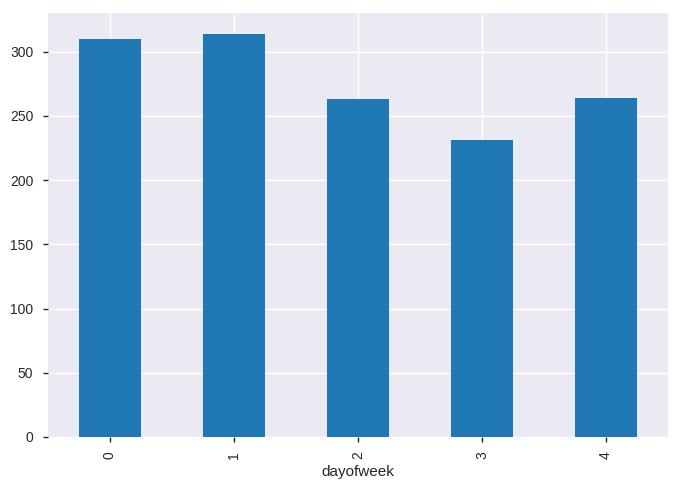

In [215]:
df.groupby("dayofweek")["bluecars_taken_sum"].count().plot(kind = 'bar')

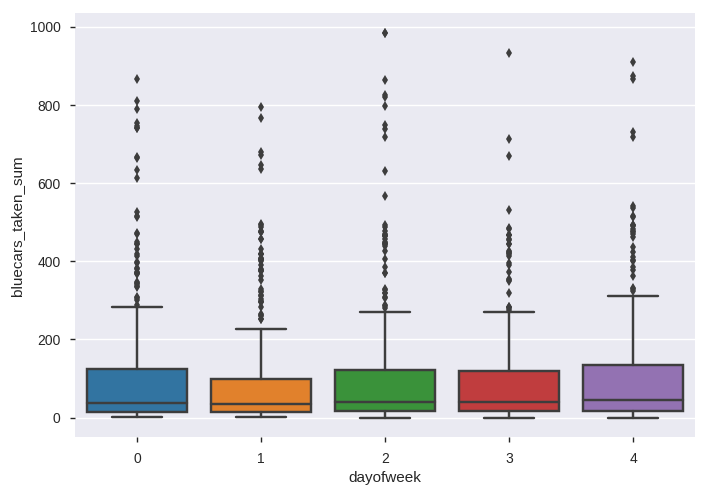

In [213]:
sns.boxplot(x = 'dayofweek', y = 'bluecars_taken_sum', data = df)
plt.show()

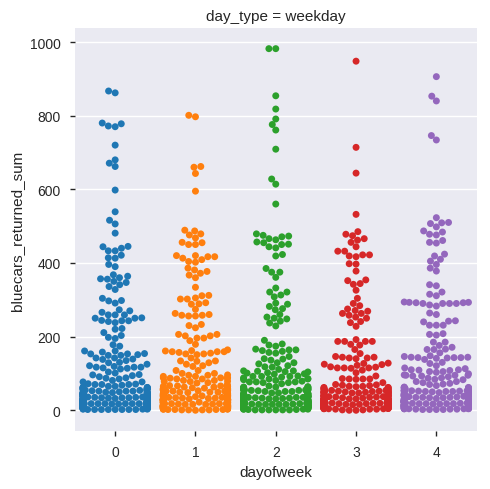

In [214]:
sns.catplot(x = "dayofweek", y = "bluecars_returned_sum", col = "day_type", kind = "swarm", data = df)

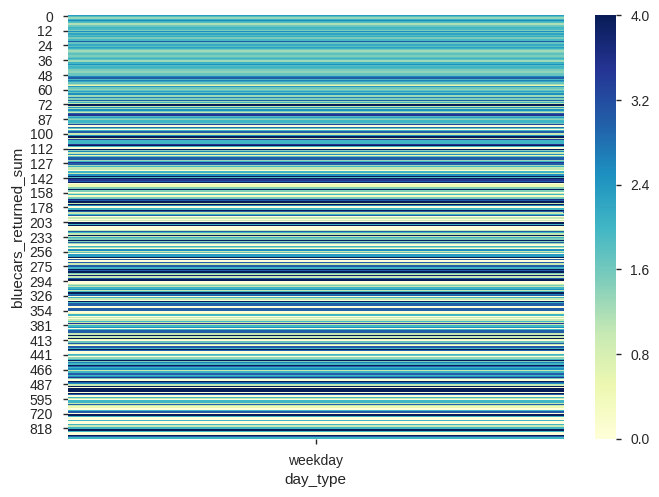

In [207]:
heatmap = pd.pivot_table(df, values='dayofweek', 
                     index=['bluecars_returned_sum'], 
                     columns='day_type')
sns.heatmap(heatmap, cmap="YlGnBu")

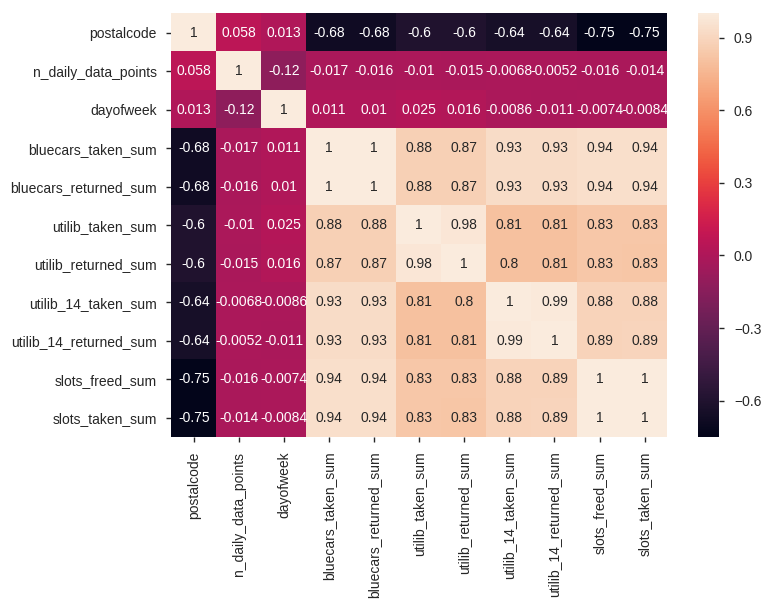

In [209]:
#heatmap
#it visualises the correlation of various columns within themselves.
import matplotlib.pyplot as plt
cr = df.corr()
sns.heatmap(cr,annot =True)
plt.show()

From bivariate analysis, we can gather that the day of the week is positively correlated to the bluecars taken sum.Though somewhat insignificant but it affects the overall outcome of the number of bluecars taken.
The autolib company needs to be cautious of the day of week to increase the number of bluecars taken.
Day 1 which is Tuesday has the highest number of bluecars used in comparison to other weekdays.
This should be put into consideration and termed as the day with the most usage of the cars.

# MULTIVARIATE ANALYSIS

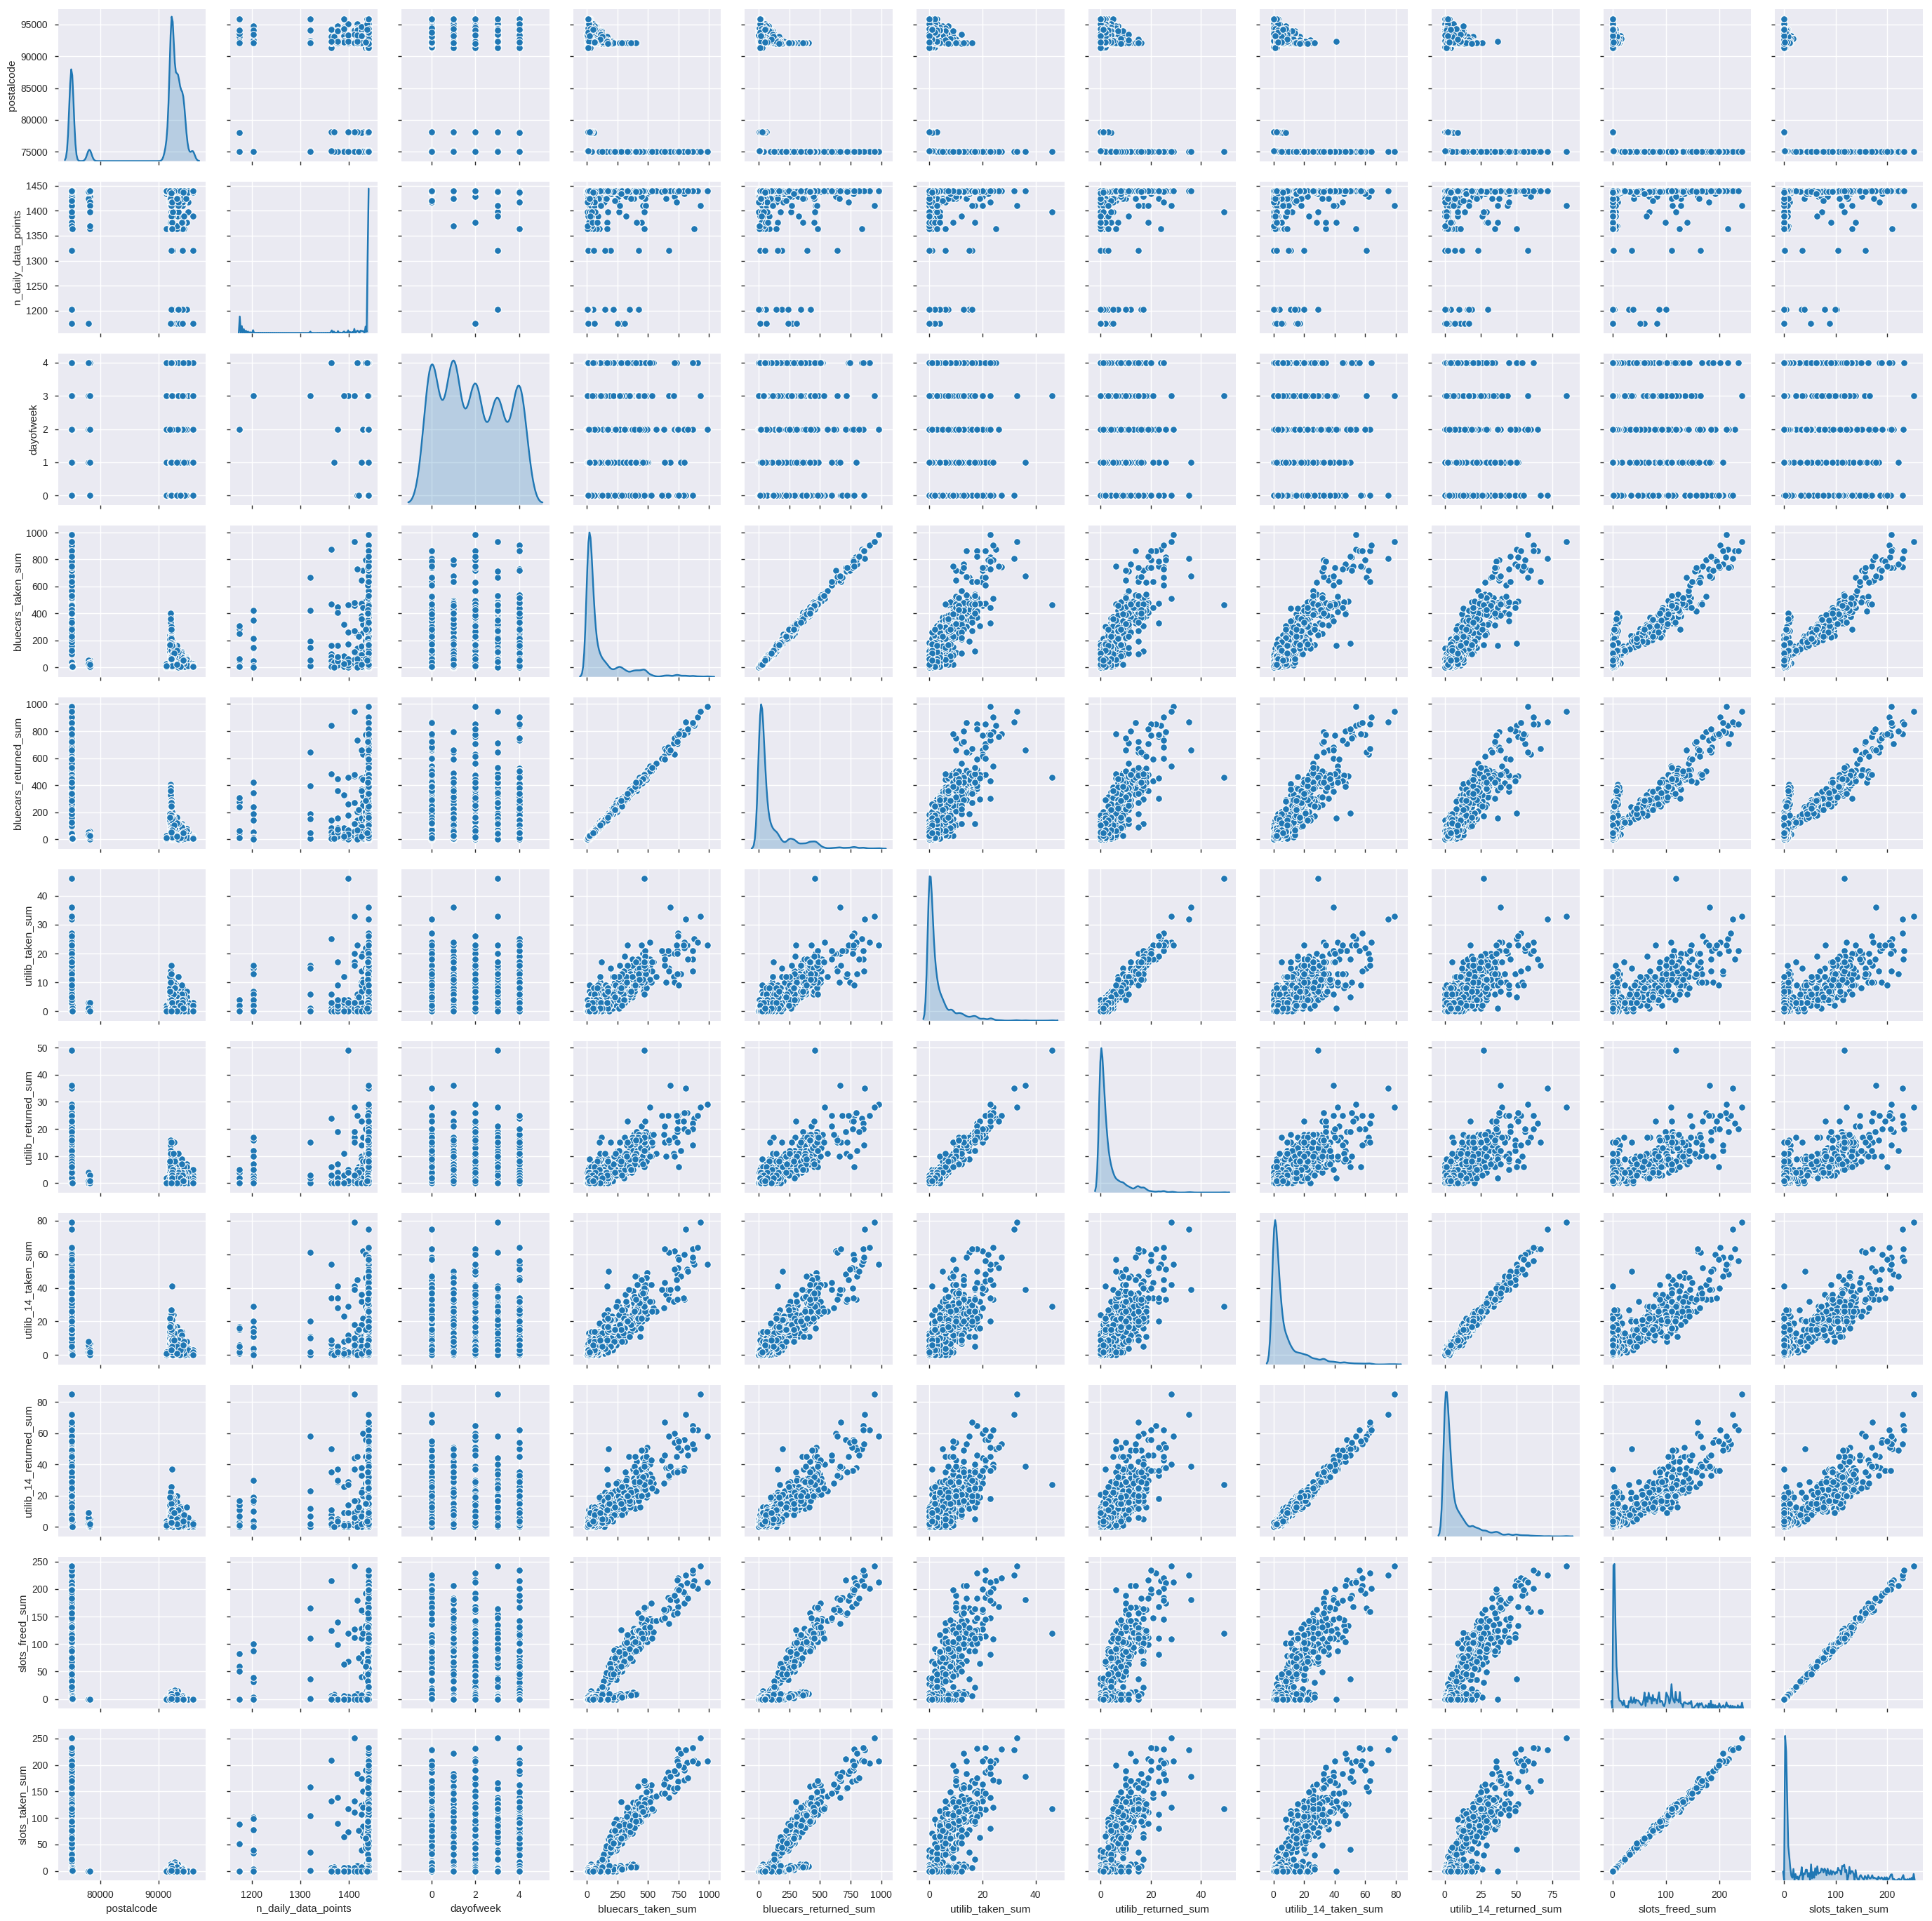

In [210]:
sns.pairplot(df, diag_kind='kde');

# HYPOTHESIS TESTING

We will try to make a decision on our hypothesis with the claim we have.

H0: Is the number of bluecars taken in area X different from area Y?Is it greater in area X than in area Z?

In [181]:

#finding the population number
autolib.shape

(16085, 13)

In [0]:
#population = 16085
#sample = 2000
#significance level = 0.05%


In [182]:
#we will use the Z test since our population n>30.
#Firstly we need to chack for normality so as to perform the test

#AndersonDarling test
from scipy.stats import shapiro
data = autolib.bluecars_taken_sum
stat, p = shapiro(data)
print('statistics = %.3f, p = %.3f'%(stat, p))
#interpreting my test
alpha = 0.05
if p > alpha:
  print('gaussian sample')
else:
  print('not gaussian')
  



statistics = 0.661, p = 0.000
not gaussian


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We will not use the z test
instead we will compare our claim using frequency tables.
our question compares the number of bluecars in different areas and whether they are equal or not.
We put to use: frequency tables, since this will give us a clear number of each postal code/area.
We'll take the first postal codes chosen from our random samples.
These are: 
94230
92700
93400	
94410
93440

In [184]:
df[df['postalcode'] ==94230 ].sum()
#the bluecars taken from this postalcode is 540

postalcode                                                           942300
date                      4/25/20186/5/20183/28/20183/14/20183/20/20185/...
n_daily_data_points                                                   14396
dayofweek                                                                16
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                      367
bluecars_returned_sum                                                   371
utilib_taken_sum                                                         20
utilib_returned_sum                                                      17
utilib_14_taken_sum                                                      31
utilib_14_returned_sum                                                   25
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [185]:
df[df['postalcode'] ==92700 ].sum()
#the bluecars in this postalcode is 881

postalcode                                                          1668600
date                      1/10/20183/5/20184/17/20181/11/20183/13/20182/...
n_daily_data_points                                                   25877
dayofweek                                                                34
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                     1734
bluecars_returned_sum                                                  1731
utilib_taken_sum                                                         58
utilib_returned_sum                                                      63
utilib_14_taken_sum                                                     134
utilib_14_returned_sum                                                  119
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [186]:
df[df['postalcode'] ==93400 ].sum()
#the bluecars in this postalcode is 1660

postalcode                                                          1307600
date                      1/1/20183/27/20185/3/20184/23/20183/19/20184/1...
n_daily_data_points                                                   20078
dayofweek                                                                23
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                     1482
bluecars_returned_sum                                                  1495
utilib_taken_sum                                                         62
utilib_returned_sum                                                      60
utilib_14_taken_sum                                                     129
utilib_14_returned_sum                                                  130
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [188]:
df[df['postalcode'] ==94410 ].sum()
#the bluecars in this postalcode is 334

postalcode                                                          1038510
date                      1/16/20183/9/20181/15/20185/24/20184/9/20184/1...
n_daily_data_points                                                   15813
dayofweek                                                                18
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                      272
bluecars_returned_sum                                                   270
utilib_taken_sum                                                         13
utilib_returned_sum                                                      14
utilib_14_taken_sum                                                      24
utilib_14_returned_sum                                                   22
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

In [187]:
df[df['postalcode'] ==93440 ].sum()
#the bluecars in this postalcode is 27

postalcode                                                          1121280
date                      5/22/20181/24/20182/23/20185/30/20181/15/20185...
n_daily_data_points                                                   17015
dayofweek                                                                22
day_type                  weekdayweekdayweekdayweekdayweekdayweekdayweek...
bluecars_taken_sum                                                       31
bluecars_returned_sum                                                    31
utilib_taken_sum                                                          2
utilib_returned_sum                                                       0
utilib_14_taken_sum                                                       4
utilib_14_returned_sum                                                    6
slots_freed_sum                                                           0
slots_taken_sum                                                           0
dtype: objec

We therefore accept the null hypothesis since the frequency tables show that the 5 postal codes have a different figure for the number of bluecars taken from the station.